
[<img align="right" src="./doc/jupyter_nb/SPM_Top.jpg" width="10%" height="10%">](./doc/jupyter_nb/SPM_Top.jpg)
 
# Kinematics Analysis of a 3-RRR Spatial Parallel Mechanism

## Introduction

Spatial Parallel Mechanisms (SPMs) are a class of robotic systems that utilize multiple kinematic chains in parallel to achieve a combination of translation and rotation motions in three-dimensional space. One common type of SPM is the 3-RRR mechanism, where "3" denotes the number of legs and "RRR" signifies revolute-revolute-revolute joints in each leg.

This Jupyter Lab notebook aims to perform a kinematic analysis of a 3-RRR SPM. Kinematics, in the context of robotics, deals with the study of motion without considering the forces causing the motion. Understanding the kinematics of a mechanism is crucial for designing and controlling robotic systems.

### Objectives

1. **Forward Kinematics:** Derive the equations to determine the end-effector position and orientation based on the joint angles of the 3-RRR SPM.
2. **Inverse Kinematics:** Develop algorithms to compute the joint angles required to achieve a desired end-effector pose.
3. **Workspace Analysis:** Explore the reachable workspace of the 3-RRR mechanism to understand its motion capabilities.
4. **Visualization:** Utilize visualizations to represent the motion and workspace of the 3-RRR SPM.

### Tools and Libraries

We will use Python for the implementation, and the following libraries:

- **SymPy:** Symbolic mathematics library for deriving kinematic equations.
- **Matplotlib:** Plotting library for visualizing the mechanism's motion and workspace.

Let's dive into the kinematics of the 3-RRR SPM and explore its behavior in three-dimensional space.

[<img src="./doc/jupyter_nb/SPM_Side_2.jpg" width="10%" height="10%">](./doc/jupyter_nb/SPM_Side_2.jpg)

#### Parameters
The basic parameters that decide the mechanical configuration are denoted by 

$\theta_i$ = Input joint position theta \
$\alpha_1$, $\alpha_2$ = The links curvature alpha 1 and alpha 2 \
$\beta$, $\gamma$ = The geometry of the regular triangular pyramids beta and gamma (gamma = 0) \
$u_i$, $v_i$, $w_i$ = The unit vectors u, v, w \
$i_1$, $i_2$, $i_3$ = three equally-spaced legs i \
$x_0$ = initial guess vector \
$\eta$ where eta is $\eta_i$ = 2($i$ - 1)$\pi$/3, $i$ = 1, 2, 3


[<img src="doc/jupyter_nb/textbox.jpg" width="50%" height="50%">](doc/jupyter_nb/textbox.jpg)

In [91]:
import sympy as sp
from sympy import symbols, cos, sin, pi, sqrt, asin, Matrix, Function, Eq, N
from IPython.display import display, Math
sp.init_printing()

# define symbols here

theta_i = sp.Symbol('theta_i')
alpha_1 = sp.Symbol('alpha_1')
alpha_2 = sp.Symbol('alpha_2')
alpha_3 = sp.Symbol('alpha_3')

beta = sp.Symbol('beta')
beta_i = sp.Symbol('beta_i')
gamma = sp.Symbol('gamma')

ui = sp.Symbol('u_i')
vi = sp.Symbol('v_i')
wi = sp.Symbol('w_i')

i1 = sp.Symbol('i_1')
i2 = sp.Symbol('i_2')
i3 = sp.Symbol('i_3')

x0 = sp.Symbol('x_0')

eta_i = sp.Symbol('eta_i')

# define expresions here

alpha_3 = 2 * asin(sin(beta) * cos(pi/6))
wi = Matrix([[cos(eta_i-theta_i)*sin(alpha_1)],[sin(eta_i-theta_i)*sin(alpha_1)],[-cos(alpha_1)]])
eta_i = [2 * (i - 1) * pi / 3 for i in range(1, 4)]

display(Math('\\alpha_3 = ' + sp.latex(alpha_3)))
display(Math('w_i = ' + sp.latex(wi)))
display(Math('\\eta_i = ' + sp.latex(eta_i)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [92]:
# Define the numerical value
beta_value = sp.N(90 * sp.pi / 180)

# Substitute the symbol with the numerical value
alpha_3_subs = alpha_3.subs(beta, beta_value)

# Display the result
display(Math('\\alpha_3 = ' + sp.latex(alpha_3_subs)))

# Get the numerical value
alpha_3_subs_numerical = alpha_3_subs.evalf()
display(Math('\\alpha_3 = ' + sp.latex(sp.N(alpha_3_subs))))
print("beta has a fixed value of 90°")
print("Numerical value of alpha_3 after substitution: ", alpha_3_subs_numerical)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

beta has a fixed value of 90°
Numerical value of alpha_3 after substitution:  2.09439510239320


In [105]:
# Define the symbols
eta_1, eta_2, eta_3, theta_1, theta_2, theta_3, alpha_1, beta = symbols('eta_1 eta_2 eta_3 theta_1 theta_2 theta_3 alpha_1 beta')

# Define the values
eta_1 = 2 * (1 - 1) * pi / 3
eta_2 = 2 * (2 - 1) * pi / 3    
eta_3 = 2 * (3 - 1) * pi / 3
theta_1 = 75 * pi / 180
theta_2 = 90 * pi / 180
theta_3 = 65 * pi / 180

alpha_1 = 45 * pi / 180
alpha_2 = 90 * pi / 180

beta = 90 * pi / 180
gamma = 0

alpha_3 = 2 * asin(sin(beta) * cos(pi/6))

# Define the list of vectors
w1 = Matrix([[sin(eta_1-theta_1)*sin(alpha_1)], [cos(eta_1-theta_1)*sin(alpha_1)], [-cos(alpha_1)]])
w2 = Matrix([[sin(eta_2-theta_2)*sin(alpha_1)], [cos(eta_2-theta_2)*sin(alpha_1)], [-cos(alpha_1)]])
w3 = Matrix([[sin(eta_3-theta_3)*sin(alpha_1)], [cos(eta_3-theta_3)*sin(alpha_1)], [-cos(alpha_1)]])

# Print the vectors
for i, vector in enumerate([w1, w2, w3], 1):
    #print(f"w_{i}: {vector}")
    display(Math('w' + str(i) + ' = ' + sp.latex(vector)))

# Convert the vectors to numerical values
w1_numerical = [N(i) for i in sp.N(w1)]
w2_numerical = [N(i) for i in sp.N(w2)]
w3_numerical = [N(i) for i in sp.N(w3)]

# Round the vectors to four decimal places
w1_numerical = [round(N(i), 4) for i in w1_numerical]
w2_numerical = [round(N(i), 4) for i in w2_numerical]
w3_numerical = [round(N(i), 4) for i in w3_numerical]

# Print the numerical vectors
print(f"w1 = {w1_numerical}")
print(f"w2 = {w2_numerical}")
print(f"w3 = {w3_numerical}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

w1 = [-0.6830, 0.1830, -0.7071]
w2 = [0.3536, 0.6124, -0.7071]
w3 = [0.0616, -0.7044, -0.7071]


In [95]:
from scipy.optimize import fsolve
import numpy as np

# Define the system of equations
def equations(variables, *args):
    v1x, v1y, v1z, v2x, v2y, v2z, v3x, v3y, v3z = variables
    w1, w2, w3 = args

    eq1 = w1[0]*v1x + w1[1]*v1y + w1[2]*v1z - np.cos(np.pi/2)
    eq2 = w2[0]*v2x + w2[1]*v2y + w2[2]*v2z - np.cos(np.pi/2)
    eq3 = w3[0]*v3x + w3[1]*v3y + w3[2]*v3z - np.cos(np.pi/2)
    eq4 = v1x*v2x + v1y*v2y + v1z*v2z - np.cos(2*np.arcsin(np.sin(np.pi/2)*np.cos(np.pi/6)))
    eq5 = v1x*v3x + v1y*v3y + v1z*v3z - np.cos(2*np.arcsin(np.sin(np.pi/2)*np.cos(np.pi/6)))
    eq6 = v3x*v2x + v3y*v2y + v3z*v2z - np.cos(2*np.arcsin(np.sin(np.pi/2)*np.cos(np.pi/6)))
    eq7 = np.sqrt(v1x**2 + v1y**2 + v1z**2) - 1
    eq8 = np.sqrt(v2x**2 + v2y**2 + v2z**2) - 1
    eq9 = np.sqrt(v3x**2 + v3y**2 + v3z**2) - 1

    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9]

# Initial guess
# initial_guess = [0, 0, 0, 0, 0, 0, 0, 0, 0]
initial_guess = [1, -1, 1, -1, -1, 1, -1, 1, 1]
# Solve numerically
solution = fsolve(equations, initial_guess, args=(w1, w2, w3))

# Display the numerical solution
print("Numerical Solution:")
print("v1x =", solution[0])
print("v1y =", solution[1])
print("v1z =", solution[2])
print("v2x =", solution[3])
print("v2y =", solution[4])
print("v2z =", solution[5])
print("v3x =", solution[6])
print("v3y =", solution[7])
print("v3z =", solution[8])


Numerical Solution:
v1x = 0.23463833986802626
v1y = 0.9717645982306949
v1z = 0.024867953062384623
v2x = 0.6968541171282346
v2y = -0.6767067021251991
v2z = -0.2376181363874942
v3x = -0.9314924537032421
v3y = -0.29505789722967923
v3z = 0.21275019618396085


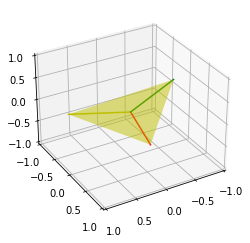

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Define vectors
#solution = [-0.5513510841989995, 0.5057847725083133, 0.6634709834282895, -0.4467293728828261, -0.5536160024743392, -0.7028102085257794, 0.9980804570218256, 0.04783123343244586, 0.039339222405068035]
#solution = [0.235, 0.972, 0.025, 0.697, -0.677,-0.238, -0.931, -0.295, 0.213] 
v1 = np.array([solution[0], solution[1], solution[2]])
v2 = np.array([solution[3], solution[4], solution[5]])
v3 = np.array([solution[6], solution[7], solution[8]])

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors
ax.plot([0, v1[0]], [0, v1[1]], [0, v1[2]], color='r')
ax.plot([0, v2[0]], [0, v2[1]], [0, v2[2]], color='y')
ax.plot([0, v3[0]], [0, v3[1]], [0, v3[2]], color='g')

# Plot the triangle
triangle = Poly3DCollection([[v1, v2, v3]], facecolor='y', alpha=0.5)
ax.add_collection3d(triangle)

# Set the limits of the plot
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.view_init(elev=30, azim=60)
# Show the plot
plt.show()

[<img src="doc/jupyter_nb/textbox2.jpg" width="50%" height="50%">](doc/jupyter_nb/textbox2.jpg)

In [106]:
from sympy import symbols, sin, cos, tan
from IPython.display import display, Math

# Define the symbols
T_1, T_2, T_3, theta_1, theta_2, theta_3 = symbols('T_1 T_2 T_3 theta_1 theta_2 theta_3')
A_1, A_2, A_3, B_1, B_2, B_3, C_1, C_2, C_3 = symbols('A_1 A_2 A_3 B_1 B_2 B_3 C_1 C_2 C_3')
v_ix, v_iy, v_iz, alpha1, alpha2 = symbols('v_ix v_iy v_iz alpha1 alpha2')

# Define the equations
eq1 = A_1*T_1**2 + 2*B_1*T_1 + C_1
eq2 = A_2*T_2**2 + 2*B_2*T_2 + C_2
eq3 = A_3*T_3**2 + 2*B_3*T_3 + C_3
T_1 = tan(theta_1/2)
T_2 = tan(theta_2/2)
T_3 = tan(theta_3/2)
A_i = -v_iy * sin(alpha1) - v_iz * cos(alpha1) - cos(alpha2)
B_i = v_ix * sin(alpha1)
C_i = v_iy * sin(alpha1) - v_iz * cos(alpha1) - cos(alpha2)

# Display the equations
display(Math(r'A_1 T_1^2 + 2 B_1 T_1 + C_1 = 0'))
display(Math(r'A_2 T_2^2 + 2 B_2 T_2 + C_2 = 0'))
display(Math(r'A_3 T_3^2 + 2 B_3 T_3 + C_3 = 0'))
display(Math(r'T_1 = \tan\left(\frac{\theta_1}{2}\right)'))
display(Math(r'T_2 = \tan\left(\frac{\theta_2}{2}\right)'))
display(Math(r'T_3 = \tan\left(\frac{\theta_3}{2}\right)'))
display(Math(r'A_i = -v_{iy} \sin(\alpha_1) - v_{iz} \cos(\alpha_1) - \cos(\alpha_2)'))
display(Math(r'B_i = v_{ix} \sin(\alpha_1)'))
display(Math(r'C_i = v_{iy} \sin(\alpha_1) - v_{iz} \cos(\alpha_1) - \cos(\alpha_2)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [107]:
from sympy import simplify, solve

# These are the numerical solutions that were calculated using Algorithm 1
v1x = 0.23463833986802626
v1y = 0.9717645982306949
v1z = 0.024867953062384623
v2x = 0.6968541171282346
v2y = -0.6767067021251991
v2z = -0.2376181363874942
v3x = -0.9314924537032421
v3y = -0.29505789722967923
v3z = 0.21275019618396085
alpha1_value = 45 * pi / 180
alpha2_value = 90 * pi / 180

A_1 = -v1y * sin(alpha1_value) - v1z * cos(alpha1_value) - cos(alpha2_value)
B_1 = v1x * sin(alpha1_value)
C_1 = v1y * sin(alpha1_value) - v1z * cos(alpha1_value) - cos(alpha2_value)

A_2 = -v2y * sin(alpha1_value) - v2z * cos(alpha1_value) - cos(alpha2_value)
B_2 = v2x * sin(alpha1_value)
C_2 = v2y * sin(alpha1_value) - v2z * cos(alpha1_value) - cos(alpha2_value)

A_3 = -v3y * sin(alpha1_value) - v3z * cos(alpha1_value) - cos(alpha2_value)
B_3 = v3x * sin(alpha1_value)
C_3 = v3y * sin(alpha1_value) - v3z * cos(alpha1_value) - cos(alpha2_value)

display(Math('A_1 = ' + sp.latex(A_1)))
display(Math('B_1 = ' + sp.latex(B_1)))
display(Math('C_1 = ' + sp.latex(C_1)))

T_1 = tan(theta_1/2)
T_2 = tan(theta_2/2)
T_3 = tan(theta_3/2)

eq1 = solve(A_1*T_1**2 + 2*B_1*T_1 + C_1,0)
eq2 = solve(A_2*T_2**2 + 2*B_2*T_2 + C_2,0)
eq3 = solve(A_3*T_3**2 + 2*B_3*T_3 + C_3,0)

A_1, B_1, C_1 = symbols('A_1 B_1 C_1')
expression_A = -v1y * sin(alpha1_value) - v1z * cos(alpha1_value) - cos(alpha2_value)
expression_B = v1x * sin(alpha1_value)
expression_C = v1y * sin(alpha1_value) - v1z * cos(alpha1_value) - cos(alpha2_value)

equation_A = expression_A - A_1
equation_B = expression_B - B_1
equation_C = expression_C - C_1

print("Equation A:", equation_A)
print("Equation B:", equation_B)
print("Equation C:", equation_C)

simplified_equation_A = simplify(equation_A)
simplified_equation_B = simplify(equation_B)
simplified_equation_C = simplify(equation_C)

print("Simplified Equation A:", simplified_equation_A)
print("Simplified Equation B:", simplified_equation_B)
print("Simplified Equation C:", simplified_equation_C)


numerical_values = {
    alpha1: alpha1_value,
    alpha2: alpha2_value,
    v1x: 0.23463833986802626,
    v1y: 0.9717645982306949,
    v1z: 0.024867953062384623,
    v2x: 0.6968541171282346,
    v2y: -0.6767067021251991,
    v2z: -0.2376181363874942,
    v3x: -0.9314924537032421,
    v3y: -0.29505789722967923,
    v3z: 0.21275019618396085
}

numerical_result_A = simplified_equation_A.subs(numerical_values)
numerical_result_B = simplified_equation_B.subs(numerical_values)
numerical_result_C = simplified_equation_C.subs(numerical_values)

print("Numerical Result A:", numerical_result_A)
print("Numerical Result B:", numerical_result_B)
print("Numerical Result C:", numerical_result_C)

numerical_result_A = numerical_result_A.evalf()
numerical_result_B = numerical_result_B.evalf()
numerical_result_C = numerical_result_C.evalf()

print("Numerical Result A:", numerical_result_A)
print("Numerical Result B:", numerical_result_B)
print("Numerical Result C:", numerical_result_C)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equation A: -A_1 - 0.49831627564654*sqrt(2)
Equation B: -B_1 + 0.117319169934013*sqrt(2)
Equation C: -C_1 + 0.473448322584155*sqrt(2)
Simplified Equation A: -A_1 - 0.49831627564654*sqrt(2)
Simplified Equation B: -B_1 + 0.117319169934013*sqrt(2)
Simplified Equation C: -C_1 + 0.473448322584155*sqrt(2)
Numerical Result A: -A_1 - 0.49831627564654*sqrt(2)
Numerical Result B: -B_1 + 0.117319169934013*sqrt(2)
Numerical Result C: -C_1 + 0.473448322584155*sqrt(2)
Numerical Result A: -A_1 - 0.704725635370586
Numerical Result B: 0.165914361247035 - B_1
Numerical Result C: 0.669557038881304 - C_1


In [90]:
from sympy import symbols, tan, solve
from math import degrees

# Equation 1
A_1_value = A_1.evalf(subs={alpha1: alpha1_value})
B_1_value = B_1.evalf(subs={alpha1: alpha1_value})
C_1_value = C_1.evalf(subs={alpha1: alpha1_value})

# Equation 2
A_2_value = A_2.evalf(subs={alpha1: alpha1_value})
B_2_value = B_2.evalf(subs={alpha1: alpha1_value})
C_2_value = C_2.evalf(subs={alpha1: alpha1_value})

# Equation 3
A_3_value = A_3.evalf(subs={alpha1: alpha1_value})
B_3_value = B_3.evalf(subs={alpha1: alpha1_value})
C_3_value = C_3.evalf(subs={alpha1: alpha1_value})

# Print the numerical values
print("Equation 1:")
print("A_1 =", A_1_value)
print("B_1 =", B_1_value)
print("C_1 =", C_1_value)

print("Equation 2:")
print("A_2 =", A_2_value)
print("B_2 =", B_2_value)
print("C_2 =", C_2_value)

print("Equation 3:")
print("A_3 =", A_3_value)
print("B_3 =", B_3_value)
print("C_3 =", C_3_value)

# Define the symbol
theta_1 = symbols('theta_1')
theta_1 = symbols('theta_2')
theta_1 = symbols('theta_3')

# Given values
numerical_solution_1 = [A_1_value, B_1_value, C_1_value]
numerical_solution_2 = [A_2_value, B_2_value, C_2_value]
numerical_solution_3 = [A_3_value, B_3_value, C_3_value]

# Define trigonometric functions
T_1 = tan(theta_1 / 2)
T_2 = tan(theta_2 / 2)
T_3 = tan(theta_3 / 2)

# Define quadratic equations
quadratic_equation_1 = Eq(A_1_value * T_1**2 + 2 * B_1_value * T_1 + C_1_value, 0)
quadratic_equation_2 = Eq(A_2_value * T_2**2 + 2 * B_2_value * T_2 + C_2_value, 0)
quadratic_equation_3 = Eq(A_3_value * T_3**2 + 2 * B_3_value * T_3 + C_3_value, 0)

# Solve for theta_1 in radians
solutions_radians_1 = solve(quadratic_equation_1, theta_1)
solutions_radians_2 = solve(quadratic_equation_2, theta_2)
solutions_radians_3 = solve(quadratic_equation_3, theta_3)

# Convert solutions to degrees
solutions_degrees_1 = [degrees(sol) for sol in solutions_radians_1]
solutions_degrees_2 = [degrees(sol) for sol in solutions_radians_2]
solutions_degrees_3 = [degrees(sol) for sol in solutions_radians_3]

print("Solutions for theta_1 in degrees:", solutions_degrees_1)
print("Solutions for theta_2 in degrees:", solutions_degrees_2)
print("Solutions for theta_2 in degrees:", solutions_degrees_3)

Equation 1:
A_1 = -0.704725635370586
B_1 = 0.165914361247035
C_1 = 0.669557038881304
Equation 2:
A_2 = 0.646525293519620
B_2 = 0.492750271719139
C_2 = -0.310482502374606
Equation 3:
A_3 = 0.0582003335533026
B_3 = -0.658664630637659
C_3 = -0.359074546394197
Solutions for theta_1 in degrees: [-75.00000000000001, 102.1491668778732]
Solutions for theta_2 in degrees: [-121.68071053717237, 29.999999999999964]
Solutions for theta_2 in degrees: [-30.15205301953126, 175.0]
